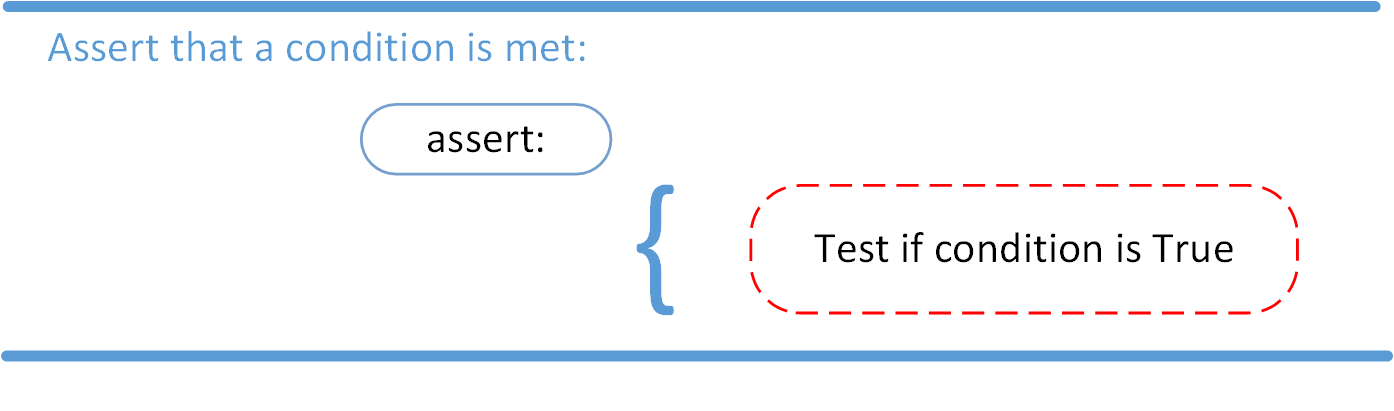

In [28]:
assert str('5').isnumeric()  # koşul yanlış ise bir AssertionError fırlatır

In [29]:
assert str('i').isnumeric()  # koşul yanlış ise bir AssertionError fırlatır

AssertionError: 

In [30]:
import sys
sys.platform

'linux'

In [33]:
# işletim sistemi Windows mu?
import sys
try:
    assert('windows' in sys.platform)
    print("OK.")
except AssertionError:
    #print(e)  #associated value: boş
    print("Windows tespit edilemedi")

Windows tespit edilemedi


In [34]:
# işletim sistemi Linux'mi
import sys
try:
    assert('linux' in sys.platform)
    print("OK.")
except AssertionError:
    #print(e)  #associated value: boş
    print("Linux tespit edilemedi")

OK.


In [35]:
raise  # Yalın kullanırsa Runtime Error veriyor....

RuntimeError: No active exception to reraise

**Kahoot (Exceptions) Çözümleri**

In [ ]:
# try except blokları bölünmez
n = 5
try:
    print(N, "!")
print("?????")
except:
    print("Hata oldu")

SyntaxError: expected 'except' or 'finally' block (<ipython-input-12-fb4c0bc9e69f>, line 5)

In [ ]:
name = "Python"
try:
    print(Name, "!")

except:
    print("Exception", end="")

print("!")

Exception!


In [ ]:
try:
    [1,2,3,4][4]
except Exception as ex:
    print(ex)

list index out of range


In [ ]:
try:
    div=5/0
except (ZeroDivisionError, TypeError) as e:
    print(e)
except Exception as e:
    print(e)


division by zero


In [ ]:
try:
    div=5/0

except Exception as e:
    print("Genel exception..:", e)

except (ZeroDivisionError, TypeError) as e:
    print(e)

Genel exception..: division by zero


In [ ]:
name=Python

NameError: name 'Python' is not defined

In [ ]:
try:
    name := Python
except SyntaxError:
    print("E1")
except NameError:
    print("E2")

SyntaxError: invalid syntax (<ipython-input-20-ec92bea40456>, line 2)

In [ ]:
try:
    name = Python
except SyntaxError:
    print("E1")
except NameError:
    print("E2")

E2


In [ ]:
def foo():
    try:
        return 1
    finally:
        return 2

k = foo()
print(k)

2


In [25]:
def foo():
    try:
        print(1, end="")
    finally:
        print(2)

foo()


12


In [26]:
try:
    4/0
except ArithmeticError:
    print("""
      │    ├── FloatingPointError
      │    ├── OverflowError
      │    └── ZeroDivisionError hatalarından biri olabilir""")
except(ValueError, TypeError, NameError):
    print("Üç hatadan biri olabilir: Value, Name, Type")


      │    ├── FloatingPointError
      │    ├── OverflowError
      │    └── ZeroDivisionError hatalarından biri olabilir


In [36]:
def foo():
    try:
        print(1, end="")
    else:
        print(2)

foo()

SyntaxError: expected 'except' or 'finally' block (<ipython-input-36-7a9d48216a83>, line 4)

In [37]:
def foo():
    try:
        print(1, end="")
    else:
        print(2)
    except:
        print(3)

foo()

SyntaxError: expected 'except' or 'finally' block (<ipython-input-37-8b247b6b5189>, line 4)

In [38]:
def foo():
    try:
        print(1)

    except:
        print(2)

    else:
        print(3)

    finally:
        print(4)
foo()

1
3
4


In [39]:
def foo():
    try:
        return(1)

    except:
        return(2)

    else:
        return(3)

    finally:
        return(4)
foo()

4

**path(dosya yolu) kavramı**

In [40]:
dosyam = "/home/bull/ali.txt"  # linux /mac
print(dosyam)

/home/bull/ali.txt


In [41]:
dosyam = "C:\home\bull\ali.txt" # windows ta dosya yolu sorunu?
print(dosyam)

C:\homeullli.txt


In [42]:
dosyam = "C:\\home\\bull\\ali.txt" # windows
print(dosyam)

C:\home\bull\ali.txt


In [43]:
dosyam = r"C:\home\bull\ali.txt" # windows (escape karakterlerini dikkate alma)
print(dosyam)

C:\home\bull\ali.txt


**PROGRAMLARDA DOSYA KULLANIMI**

Gerçek dünyada verilerin kod içerisinde oluşturulmasıyla seyrek karşılaşılmaktadır. Analiz edilecek edilecek veriler ya dosyalardan okunmakta ya da başka bir ortamdan (örneğin bir dosya, veritabanı, web ortamı gibi) alınmaktadır. Tabii en yaygın karşılaşılan durum verilerin bir text dosyadan alınmasıdır.

**Text dosyalarda veriler ya tablosal biçimde yani satır satır ya da düz biçimde bulunmaktadır.** Tablosal biçimdeki veriler genellikle aralarına ',' karakteri ya da TAB karakter getirilerek dosyalarda satır satır bulundurulmaktadır.

    Bilindiği gibi aralarına ',' karakteri getirilerek tablosal biçimde oluşturulmuş olan dosyalara CSV dosyaları denilmektedir.


In [ ]:
# Dosya İşlemleri
#1. Dosya açılır
myfile = open("/content/fishes.txt")

#2. Dosya üzerinde ilgili işlemler yapılır
print(myfile.read())  # tüm dosyayı okur

#3. Dosya kapatılır.
myfile.close()

**Açılan dosyayı niçin kapatırız?**


* Aslında arka planda işletim sistemlerinin hepsi proses/süreç bittiğinde açtığı dosyaları otomatik kapatmaktadır. Fakat açık dosyalar işletim sistemi genelinde bir kaynak kullanımına yol açmaktadır.
*   Ayrıca işletim sistemlerinde her prosesin açabileceği maksimum dosya sayısı çeşitli değerlerle sınırlandırılmıştır. Bu nedenlerle dosya ile işimiz bitince onu kapatmamız en doğru yol olur.


*   Python'da dosya nesnesi çöp durumuna geldiğinde Python'ın çöp toplayıcısı dosya nesnesine ilişkin sınıfın del fonksiyonunu çağırmaktadır. Bu fonksiyon da dosyayı kapatır. Yani dosya nesnesi artık kullanılmadığında (örneğin nesnenin faaliyet alanı bittiğinde) dosya zaten kapatılmaktadır.

*   Fakat ne olursa olsun en iyi teknik işlemler bitince
dosyayı programcının kendisinin close metodu ile ya da with deyimi sayesinde kapatmasıdır.

*   Dosya kapatılmışsa dosyanın yeniden kapatılması exception'a yol açmamaktadır.





# Dosya(File) metotlarına toplu bakış

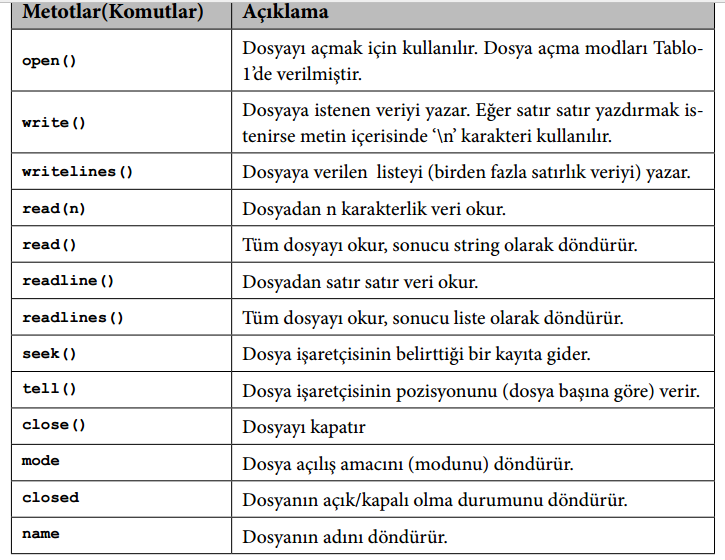

In [45]:
!pwd

/content


In [47]:
# dosya hakkında bilgi veren ATTRIBUTES (özellikler)
SIIR = open("/content/rumi.txt")
# siir: dosya değişkeni
print("Dosya adı..:", SIIR.name)
print("Dosya modu.:", SIIR.mode)
print("Dosya kapatıldı mı?", SIIR.closed)
print("Dosya encoding.:", SIIR.encoding)
SIIR.close()
print("Dosya kapatıldı mı?", SIIR.closed)

Dosya adı..: /content/rumi.txt
Dosya modu.: r
Dosya kapatıldı mı? False
Dosya encoding.: UTF-8
Dosya kapatıldı mı? True


In [48]:
# Built-in open fonksiyonunda text modda bir dosya açıldığında default encoding sistemden sisteme değişebilmektedir.
# Sisteminizdeki default encoding'i öğrenme
import locale
print(locale.getpreferredencoding(False))

UTF-8


In [49]:
#codecs modülünün encode fonksiyonu ile bir yazıyı istediğimiz bir karakter tablosuna
#göre kodlayabiliriz, decode fonksiyonu ile de bunu geri çözebiliriz. Örneğin:
import codecs
b = codecs.encode('ağrı dağı', encoding='utf-8')
print(type(b))
print(b)
#b'a\xc4\x9fr\xc4\xb1 da\xc4\x9f\xc4\xb1'

<class 'bytes'>
b'a\xc4\x9fr\xc4\xb1 da\xc4\x9f\xc4\xb1'


In [50]:
# encode fonksiyonu bizden kodlanacak yazıyı str sınıf olarak ister ve geri dönüş değeri olarak da bize
# bytes cinsinden kodlanmış olan yazıyı verir. Şimdi de biz yazıyı yeniden decode fonksiyonu ile str türüne dönüştürelim:
s = codecs.decode(b, encoding='utf-8')
print(type(s))
print(s)

<class 'str'>
ağrı dağı


In [51]:
FILE = open("/content/rumi.txt")
type(FILE)

_io.TextIOWrapper

**open() metodu:**

In [ ]:
help(open)

**"mode" parametresi;**

'r'       open for reading (default)

'w'       open for writing, truncating the file first

'x'       create a new file and open it for writing

'a'       open for writing, appending to the end of the file if it exists

'b'       binary mode

't'       text mode (default)

'+'       open a disk file for updating (reading and writing)

In [53]:
my_file = open("test_ad.txt")  # this syntax opens a 'txt' file
print(type(my_file))

<class '_io.TextIOWrapper'>


In [55]:
# try-except blokları ile dosya
# açılırken ki olası hatalar nasıl önlenebilir.
FILE = "/content/test_ad.txt"
f = open(FILE)
try:
    f = open(FILE)
    data = f.read() # f dosyasındaki tüm kayıtları oku

except OSError as ex:
    print("Dosya hatası..:", ex)

else:
    print(data)     # data içeriğini ekrana bas

finally:
    f.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/test_ad.txt'

In [58]:
FILE = "/content/test_ad.txt"

try:
    with open(FILE) as f:
        data = f.read() # f dosyasındaki tüm kayıtları oku

except OSError as ex:
    print("Dosya hatası..:", ex)

else:
    print(data)     # data içeriğini ekrana bas


Dosya hatası..: [Errno 2] No such file or directory: '/content/test_ad.txt'


In [59]:
print.__doc__

"print(value, ..., sep=' ', end='\\n', file=sys.stdout, flush=False)\n\nPrints the values to a stream, or to sys.stdout by default.\nOptional keyword arguments:\nfile:  a file-like object (stream); defaults to the current sys.stdout.\nsep:   string inserted between values, default a space.\nend:   string appended after the last value, default a newline.\nflush: whether to forcibly flush the stream."

In [76]:
# isminizi 5 kez print ile "test_ad.txt" isimli dosyaya nasıl yazarız
FILE = open("/content/test_ad.txt", mode='w')
print("Python\n"*5, file=FILE)

In [ ]:
#open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)

In [77]:
# Dosya nesnesine ilişkin sınıf "dolaşılabilir (iterable)" biçimdedir.
# Dolayısıyla biz bu sınıfı for döngüsüyle dolaşabiliriz.
# Dosya nesneleri bu biçimde dolaşıldığında her yinelemede sonraki satır elde edilir.
# Yani dolaşma string biçiminde
# satır temelinde yapılmaktadır. Örneğin:
with open('test_ad.txt', 'r') as f:
    for line in f:
        print(line, end='')

Python
Python
Python
Python
Python



In [78]:
with open('test_ad.txt', 'rt') as f:
    for line in f:
        print(line, end='')

Python
Python
Python
Python
Python



In [79]:
with open('test_ad.txt', 'r+') as f:  #r+ okuma sonra yazma amaçlı açtım
    for line in f:
        print(line, end='')
    print("dede\n"*3, file=f)

Python
Python
Python
Python
Python



In [83]:
my_file = open("/content/fishes.txt", mode='r')

#...... dosya üzerinde işlemler: tüm kayıtları oku
print(my_file.read())


my_file.close()

Orca is a kind of Dolphin.
Blue Whale is the largest animal known on earth.
Sharks are the sister group to the Rays (batoids).
The Tuna Fish can weigh up to 260 kg.
Squid and Octopus are in the same class.


In [82]:
my_file = open("/content/fishes.txt", mode='r')

#...... dosya üzerinde işlemler: tüm kayıtları oku
data = my_file.read()
print(type(data))  # okuduklarını str veri tipinde tutar


my_file.close()

<class 'str'>


In [84]:
my_file = open("/content/fishes.txt", mode='r')

#...... dosya üzerinde işlemler: ilk 33 karakteri oku
print(my_file.read(33))


my_file.close()

Orca is a kind of Dolphin.
Blue W


In [89]:
my_file = open("/content/fishes.txt", mode='r')

#...... dosya üzerinde işlemler: ilk 33 sonra 25 karakteri oku
print(my_file.read(33))
print(my_file.read(25))
# print(my_file.tell())  # 58
my_file.close()

Orca is a kind of Dolphin.
Blue W
hale is the largest anima
58


In [88]:
my_file = open("/content/fishes.txt", mode='r')

print(my_file.read(33))  # ilk 33 karakteri oku
print(my_file.read(25))  # sonra 25 karakter oku

my_file.seek(0)          # başa konumlan
print(my_file.read(33))  # ilk 33 karakteri oku

print(my_file.tell())    # dosya imlecinin(pointer) yerni söyler

my_file.close()

Orca is a kind of Dolphin.
Blue W
hale is the largest anima
Orca is a kind of Dolphin.
Blue W
33


In [99]:
my_file = open("/content/rumi.txt", mode='r')
print(my_file.read())
my_file.seek(0)
print("-"*23)
print(my_file.read(36))
print()
print(my_file.read(13))
print(my_file.tell())
print()
my_file.seek(15)  # 2.satır başına konumlan
print(my_file.read(20))

I want to sing
Like the birds sing,
Not worrying about
Who hears or
What they think.
-----------------------
I want to sing
Like the birds sing,


Not worrying 
49

Like the birds sing,


In [91]:
my_file = open("/content/rumi.txt", mode='r')
print(my_file.read(36))

I want to sing
Like the birds sing,



In [100]:
sea = open("fishes.txt", mode='r')
print(sea.readline())
print(sea.readline())
print(sea.readline())
sea.close()

Orca is a kind of Dolphin.

Blue Whale is the largest animal known on earth.

Sharks are the sister group to the Rays (batoids).



In [102]:
sea = open("fishes.txt", mode='r')
print(sea.readline(13))
print(sea.readline(13))
print(sea.readline(13))
print(sea.readline(13))
sea.close()

Orca is a kin
d of Dolphin.


Blue Whale is


In [104]:
sea = open("fishes.txt", mode='r')
print(sea.readline(13))
print(sea.readline(13))
print(sea.readline(99))
print(sea.readline(13))
sea.close()

Orca is a kin
d of Dolphin.


Blue Whale is


In [107]:
rf = open("rumi.txt", mode='r')
print(rf.readline())
print(rf.readline())
print(rf.readline(3))  #3. satırdan ilk 3 karakteri oku
sea.close()

I want to sing

Like the birds sing,

Not


In [110]:
sea = open("fishes.txt", mode='r')
sea.readlines()

['Orca is a kind of Dolphin.\n',
 'Blue Whale is the largest animal known on earth.\n',
 'Sharks are the sister group to the Rays (batoids).\n',
 'The Tuna Fish can weigh up to 260 kg.\n',
 'Squid and Octopus are in the same class.']

In [115]:
rf = open("rumi.txt", mode='r')
print(rf.readlines())

['I want to sing\n', 'Like the birds sing,\n', 'Not worrying about\n', 'Who hears or\n', 'What they think.']


In [111]:
sea = open("fishes.txt", mode='r')
print(sea.readline())
print(sea.readlines())

Orca is a kind of Dolphin.

['Blue Whale is the largest animal known on earth.\n', 'Sharks are the sister group to the Rays (batoids).\n', 'The Tuna Fish can weigh up to 260 kg.\n', 'Squid and Octopus are in the same class.']


In [112]:
print(type(sea.readlines()))

<class 'list'>


In [113]:
print(type(sea.readline()))

<class 'str'>


In [114]:
print(type(sea.read()))

<class 'str'>


In [116]:
sea = open("fishes.txt", mode='r')
for line in sea:
    print(line)

Orca is a kind of Dolphin.

Blue Whale is the largest animal known on earth.

Sharks are the sister group to the Rays (batoids).

The Tuna Fish can weigh up to 260 kg.

Squid and Octopus are in the same class.


In [117]:
sea = open("fishes.txt", mode='r')
for line in sea:
    print(line, end="")
sea.close()

Orca is a kind of Dolphin.
Blue Whale is the largest animal known on earth.
Sharks are the sister group to the Rays (batoids).
The Tuna Fish can weigh up to 260 kg.
Squid and Octopus are in the same class.

In [118]:
sea = open("fishes.txt", mode='r')
for line in sea.readlines():
    print(line, end="")
sea.close()

Orca is a kind of Dolphin.
Blue Whale is the largest animal known on earth.
Sharks are the sister group to the Rays (batoids).
The Tuna Fish can weigh up to 260 kg.
Squid and Octopus are in the same class.

In [124]:
sea = open("fishes.txt", mode='r')
for line in sea.readlines():
    print(line, end="")
    print(type(line))
sea.close()

Orca is a kind of Dolphin.
<class 'str'>
Blue Whale is the largest animal known on earth.
<class 'str'>
Sharks are the sister group to the Rays (batoids).
<class 'str'>
The Tuna Fish can weigh up to 260 kg.
<class 'str'>
Squid and Octopus are in the same class.<class 'str'>


In [130]:
# açtıktan sonra dosyayı otomatik kapatmak için
# with open(...) as dosya_degisken...
with open("fishes.txt", mode="r") as fr:
    print(fr.read())
    print(fr.closed)
print("----")
fr.closed  # dosya kapalı

Orca is a kind of Dolphin.
Blue Whale is the largest animal known on earth.
Sharks are the sister group to the Rays (batoids).
The Tuna Fish can weigh up to 260 kg.
Squid and Octopus are in the same class.
False
----


True

In [133]:
with open("rumi.txt", mode="r") as fr:
    print(fr.readlines())


['I want to sing\n', 'Like the birds sing,\n', 'Not worrying about\n', 'Who hears or\n', 'What they think.']


In [134]:
with open("rumi.txt", mode="r") as fr:
    print(fr.readline())

I want to sing



In [135]:
with open("rumi.txt", mode="r") as fr:
    print(fr.read())

I want to sing
Like the birds sing,
Not worrying about
Who hears or
What they think.


In [136]:
siir = """
Aşıklarla başa çıkacak gücün yoksa eğer;
Aşka öyleyse ne diye hayret ediyorsun, etme.

Ey, cennetin cehennemin elinde oldugu kişi,
Bize cenneti öyle cehennem ediyorsun, etme."""

with open("rumi.txt", mode="w") as fw:
    print(siir, file=fw)

In [137]:
my_file = open("fishes.txt", encoding ="utf-8")

print(type(my_file))

<class '_io.TextIOWrapper'>
